In [25]:
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division 
import os

In [26]:
data_dir=u'/home/ernst/ETH-CAS/MachineLearning/Project1//'
train_dir=data_dir + u'/set_train//'
image_paths=[train_dir + img_name for img_name in os.listdir(train_dir) if img_name.endswith('.nii')]

#### Investigate the first image

In [27]:
img=nib.load(image_paths[0])
img_data=img1.get_data()

In [28]:
print img1.shape 
print img1.get_data_dtype() 
print img1.header
print img1.affine

(176, 208, 176, 1)
int16
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 16384
session_error   : 0
regular         : r
dim_info        : 0
dim             : [  4 176 208 176   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [ 1.  1.  1.  1.  0.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 3193
glmin           : 0
descrip         :                                                                                
aux_file        :                        
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       :

176x208x176 pixels, 16 bit per pixel. An affine transformation matrix is defined (does not seem relevant for now)

In [29]:
from ipywidgets import widgets
from IPython import display

In [30]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [31]:
class SliceShow(object):
    def __init__(self,img):
        ''' img should be a 3-d np array
        axis determines the direction of slicing'''
        self.img=img
    def launch(self):        
        plt.figure(0)
        self._create_axiswidget()
        self._create_slicewidget()

    def _create_axiswidget(self):
        self._axiswgt=widgets.Dropdown(description='axis',options=['0','1','2'])
        display.display(self._axiswgt)
        
        self._axiswgt.observe(self.show_slice)
        self.axis=int(self._axiswgt.value)
        
    def _create_slicewidget(self):
        max_val=self.img.shape[self.axis]
        self._slider=widgets.IntSlider(description='slice index', min=0,max=max_val)
        display.display(self._slider)
        self._slider.observe(self.show_slice)
        
    def show_slice(self,btn):
        self.axis=int(self._axiswgt.value)
        display.clear_output(wait=True)
        ax=plt.subplot(111)
        slice_val=self._slider.value
        if self.axis==0:
            #There must be a nicer way to program this. Quick-and-dirty solution
            ax.imshow(self.img[slice_val,:,:,0])
        elif self.axis==1:
            ax.imshow(self.img[:,slice_val,:,0])
        elif self.axis==2:            
            ax.imshow(self.img[:,:,slice_val,0])
            
        plt.draw()

In [32]:
sc=SliceShow(img_data)

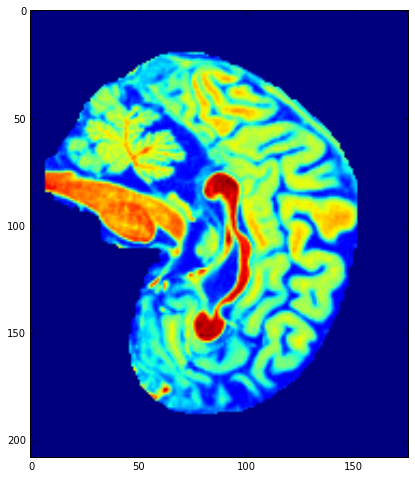

In [33]:
sc.launch()